In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

import datetime as dt

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
    # Variable to store results
results_june = []
    # session that we created earlier so that we can query our database
results_june = session.query(Measurement.date, Measurement.tobs)
#print(results.all())

In [5]:
#  3. Convert the June temperatures to a list.
    # add a function that extracts all of the results from our query and 
    # put them in a list. To do this, add .all() to the end of our 
    # existing query.
# results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
results_june = session.query(Measurement.date, Measurement.tobs).filter(extract('year', Measurement.date) == 2017 ).filter(extract('month', Measurement.date) == 6 ).all()
#print(results_june)


In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
    #  provide our results variable as one parameter 
    # and specify the column names as our second parameter.
df = pd.DataFrame(results_june, columns=['date','temperature'])

# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()
pd.set_option('display.max_rows', None)
print(df)

                  date  temperature
date                               
2017-06-01  2017-06-01         79.0
2017-06-01  2017-06-01         79.0
2017-06-01  2017-06-01         81.0
2017-06-01  2017-06-01         74.0
2017-06-01  2017-06-01         76.0
2017-06-01  2017-06-01         80.0
2017-06-02  2017-06-02         76.0
2017-06-02  2017-06-02         78.0
2017-06-02  2017-06-02         79.0
2017-06-02  2017-06-02         76.0
2017-06-02  2017-06-02         81.0
2017-06-02  2017-06-02         79.0
2017-06-03  2017-06-03         79.0
2017-06-03  2017-06-03         76.0
2017-06-03  2017-06-03         74.0
2017-06-03  2017-06-03         80.0
2017-06-03  2017-06-03         76.0
2017-06-03  2017-06-03         79.0
2017-06-04  2017-06-04         79.0
2017-06-04  2017-06-04         81.0
2017-06-04  2017-06-04         77.0
2017-06-04  2017-06-04         78.0
2017-06-04  2017-06-04         79.0
2017-06-04  2017-06-04         77.0
2017-06-05  2017-06-05         78.0
2017-06-05  2017-06-05      

<AxesSubplot:xlabel='date'>

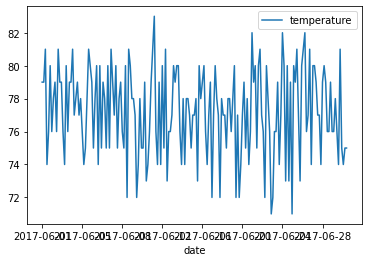

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.plot()

In [8]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,temperature
count,191.000000
mean,77.219895
std,2.622538
min,71.000000
25%,75.000000
50%,77.000000
75%,79.000000
max,83.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
    # Variable to store results
results_dec = []
    # session that we created earlier so that we can query our database
results_dec = session.query(Measurement.date, Measurement.tobs)
#print(results.all())

In [10]:
# 7. Convert the December temperatures to a list.

   # add a function that extracts all of the results from our query and 
    # put them in a list. To do this, add .all() to the end of our 
    # existing query.
results_dec = session.query(Measurement.date, Measurement.tobs).filter(extract('year', Measurement.date) == 2016 ).filter(extract('month', Measurement.date) == 12 ).all()
#print(results)

In [11]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
    #  provide our results variable as one parameter 
    # and specify the column names as our second parameter.
df = pd.DataFrame(results_dec, columns=['date','temperature'])

# Sort the dataframe by date
df.set_index(df['date'], inplace=True)
df = df.sort_index()
#pd.set_option('display.max_rows', None)
#df

<AxesSubplot:xlabel='date'>

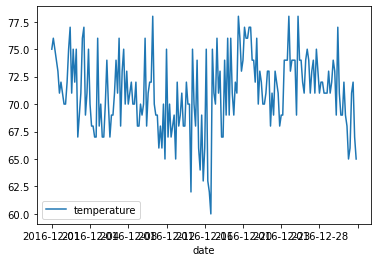

In [12]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.plot()

In [13]:
df.describe()

,temperature
count,200.000000
mean,71.130000
std,3.419292
min,60.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,78.000000
